In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


url="loan_prediction.csv"
#df_loan = np.genfromtxt(url, delimiter=',', dtype='object')
df_loan = pd.read_csv(url, sep=",")
#df_loan.drop('Loan_ID', axis=1, inplace= True)
df_loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [2]:
df_loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [3]:
df_loan.info()
df_loan.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [4]:
df_loan.shape

(614, 13)

In [5]:
df_loan.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [6]:
#total nos of loan approved
df_loan['Loan_Status'].value_counts()['Y']

422

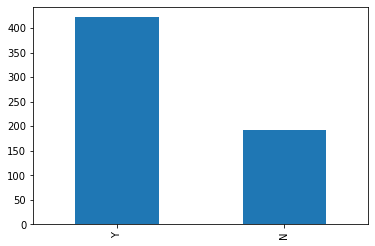

In [7]:
df_loan['Loan_Status'].value_counts().plot.bar()

In [8]:
df_loan['Loan_Status'].value_counts(normalize=True)


Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

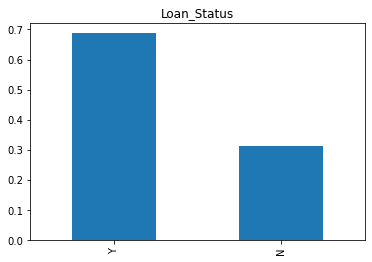

In [9]:
#almost 80% of the applicant whose loan is approved
df_loan['Loan_Status'].value_counts(normalize=True).plot.bar(title="Loan_Status")

In [10]:
#checking the existence of null values in each column
df_loan.isnull().any()

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [11]:
#checking the number of null values in each column
df_loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
#fill the missing values for categorical terms-mode
df_loan["Gender"]=df_loan["Gender"].fillna(df_loan["Gender"].mode()[0])
df_loan["Married"]=df_loan["Married"].fillna(df_loan["Married"].mode()[0])
df_loan["Dependents"]=df_loan["Dependents"].fillna(df_loan["Dependents"].mode()[0])
df_loan["Self_Employed"]=df_loan["Self_Employed"].fillna(df_loan["Self_Employed"].mode()[0])
df_loan["Credit_History"]=df_loan["Credit_History"].fillna(df_loan["Credit_History"].mode()[0])

In [13]:
df_loan.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

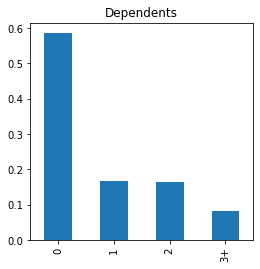

In [14]:
#visualizing categorical features
# around 60% of the applicants in the datset are 0 dependents
df_loan['Dependents'].value_counts(normalize=True).plot.bar(figsize=(4,4),title="Dependents")

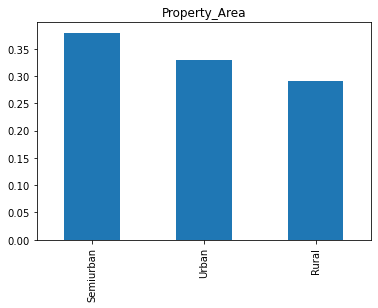

In [15]:
# around 40% of the applicants in the datset are semiurban
df_loan['Property_Area'].value_counts(normalize=True).plot.bar(title="Property_Area")

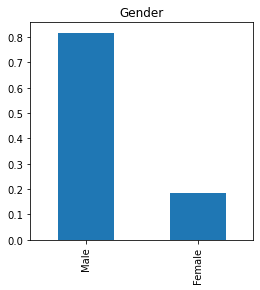

In [16]:
# 80% of the applicants in the datset are male
df_loan['Gender'].value_counts(normalize=True).plot.bar(figsize=(4,4),title="Gender")

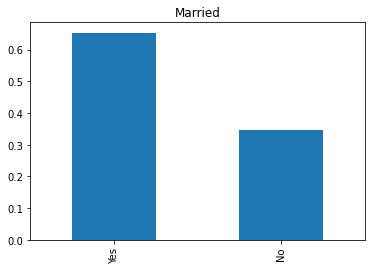

In [17]:
# around 65% of the applicants in the datset are married
df_loan['Married'].value_counts(normalize=True).plot.bar(title="Married")

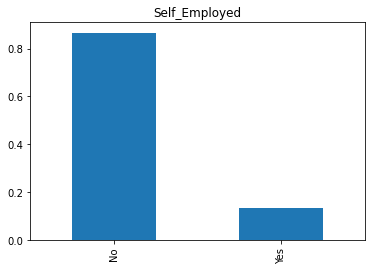

In [18]:
# around 15% of the applicants in the datset are self employed
df_loan['Self_Employed'].value_counts(normalize=True).plot.bar(title="Self_Employed")

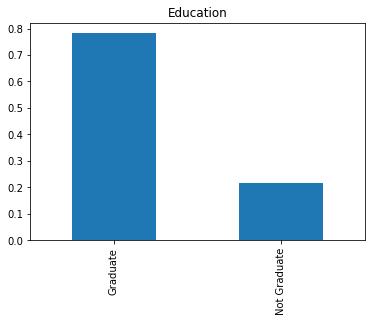

In [19]:
#  80% of the applicants in the datset are graduated
df_loan['Education'].value_counts(normalize=True).plot.bar(title="Education")

In [20]:
#now lets fill the missing values in numerical features
# in Loan_Amount_Term we will look into the value count
df_loan['Loan_Amount_Term'].value_counts()

# we can see that the value of 360 is repeating the most


360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [21]:
# so we will replace the missing value using the mode of this variable
df_loan['Loan_Amount_Term']=df_loan["Loan_Amount_Term"].fillna(df_loan["Loan_Amount_Term"].mode()[0])

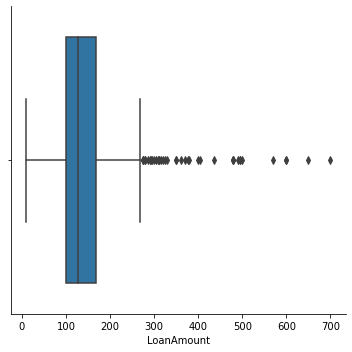

In [22]:
# visualizing the LoanAmount
sns.catplot(x='LoanAmount',kind='box',data=df_loan)

In [23]:
#filling the missing values with median value due to outliers
df_loan['LoanAmount']=df_loan["LoanAmount"].fillna(df_loan["LoanAmount"].median())

In [24]:
df_loan.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [25]:
df_loan=df_loan.drop('Loan_ID', axis=1)

In [26]:
df_loan.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


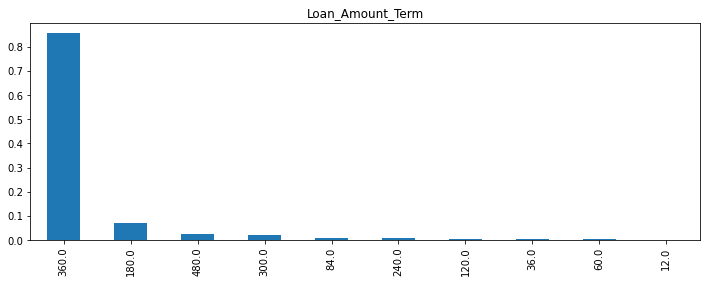

In [27]:
#around 85% of the loan are 360 months term 
df_loan['Loan_Amount_Term'].value_counts(normalize=True).plot.bar(title="Loan_Amount_Term",figsize=(12,4))

In [28]:
print(pd.crosstab(df_loan['Gender'],df_loan['Loan_Status']))

Loan_Status    N    Y
Gender               
Female        37   75
Male         155  347


Text(0, 0.5, 'Percentage')

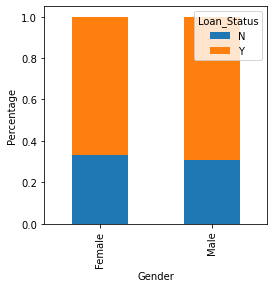

In [29]:
Gender=pd.crosstab(df_loan["Gender"],df_loan['Loan_Status'])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Gender")
plt.ylabel("Percentage")

Loan_Status    N    Y
Married              
No            79  134
Yes          113  288


Text(0, 0.5, 'Percentage')

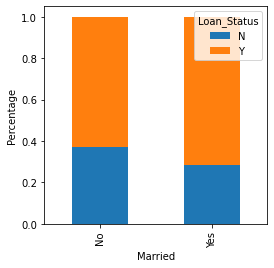

In [30]:
print(pd.crosstab(df_loan["Married"],df_loan['Loan_Status']))
Married=pd.crosstab(df_loan["Married"],df_loan['Loan_Status'])
Married.div(Married.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Married")
plt.ylabel("Percentage")

Loan_Status    N    Y
Dependents           
0            113  247
1             36   66
2             25   76
3+            18   33


Text(0, 0.5, 'Percentage')

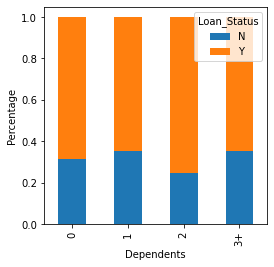

In [31]:
print(pd.crosstab(df_loan['Dependents'],df_loan['Loan_Status']))
Dependents=pd.crosstab(df_loan['Dependents'],df_loan['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Dependents")
plt.ylabel("Percentage")

Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82


Text(0, 0.5, 'Percentage')

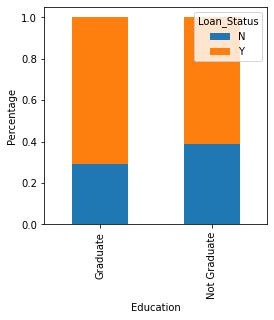

In [32]:
print(pd.crosstab(df_loan['Education'],df_loan['Loan_Status']))
Education=pd.crosstab(df_loan['Education'],df_loan['Loan_Status'])
Education.div(Education.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Education")
plt.ylabel("Percentage")

Loan_Status      N    Y
Self_Employed          
No             166  366
Yes             26   56


Text(0, 0.5, 'Percentage')

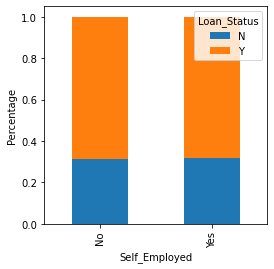

In [33]:
print(pd.crosstab(df_loan['Self_Employed'],df_loan['Loan_Status']))
Self_Employed=pd.crosstab(df_loan['Self_Employed'],df_loan['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Self_Employed")
plt.ylabel("Percentage")

Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133


Text(0, 0.5, 'Percentage')

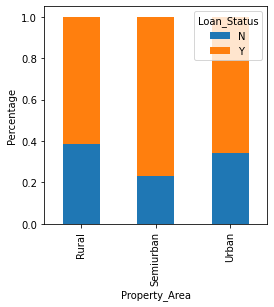

In [34]:
print(pd.crosstab(df_loan['Property_Area'],df_loan['Loan_Status']))
Property_Area=pd.crosstab(df_loan['Property_Area'],df_loan['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Property_Area")
plt.ylabel("Percentage")

In [35]:
df_loan.Loan_Status=df_loan.Loan_Status.map({'Y':1,'N':0})
df_loan['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [36]:
df_loan.Gender=df_loan.Gender.map({'Male':1,'Female':0})
df_loan['Gender'].value_counts()

1    502
0    112
Name: Gender, dtype: int64

In [37]:
df_loan.Married=df_loan.Married.map({'Yes':1,'No':0})
df_loan['Married'].value_counts()

1    401
0    213
Name: Married, dtype: int64

In [38]:
df_loan.Dependents=df_loan.Dependents.map({'1':1,'0':0,'2':2,'3+':3})
df_loan['Dependents'].value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [39]:
df_loan.Education=df_loan.Education.map({'Graduate':1,'Not Graduate':0})
df_loan['Education'].value_counts()

1    480
0    134
Name: Education, dtype: int64

In [40]:
df_loan.Self_Employed=df_loan.Self_Employed.map({'Yes':1,'No':0})
df_loan['Self_Employed'].value_counts()

0    532
1     82
Name: Self_Employed, dtype: int64

In [41]:
df_loan.Property_Area=df_loan.Property_Area.map({'Semiurban':1,'Urban':0,'Rural':2})
df_loan['Property_Area'].value_counts()

1    233
0    202
2    179
Name: Property_Area, dtype: int64

In [42]:
df_loan['LoanAmount']=df_loan.LoanAmount.astype(int)
df_loan['LoanAmount']

0      128
1      128
2       66
3      120
4      141
      ... 
609     71
610     40
611    253
612    187
613    133
Name: LoanAmount, Length: 614, dtype: int32

In [43]:
df_loan['CoapplicantIncome']=df_loan.CoapplicantIncome.astype(int)
df_loan['CoapplicantIncome']

0         0
1      1508
2         0
3      2358
4         0
       ... 
609       0
610       0
611     240
612       0
613       0
Name: CoapplicantIncome, Length: 614, dtype: int32

In [44]:
df_loan['Loan_Amount_Term']=df_loan.Loan_Amount_Term.astype(int)
df_loan['Loan_Amount_Term']

0      360
1      360
2      360
3      360
4      360
      ... 
609    360
610    180
611    360
612    360
613    360
Name: Loan_Amount_Term, Length: 614, dtype: int32

In [45]:
df_loan['Credit_History']=df_loan.Credit_History.astype(int)
df_loan['Credit_History']

0      1
1      1
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Credit_History, Length: 614, dtype: int32

In [46]:
df_loan.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0,128,360,1,0,1
1,1,1,1,1,0,4583,1508,128,360,1,2,0
2,1,1,0,1,1,3000,0,66,360,1,0,1
3,1,1,0,0,0,2583,2358,120,360,1,0,1
4,1,0,0,1,0,6000,0,141,360,1,0,1


In [47]:
df_loan.tail()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,0,0,0,1,0,2900,0,71,360,1,2,1
610,1,1,3,1,0,4106,0,40,180,1,2,1
611,1,1,1,1,0,8072,240,253,360,1,0,1
612,1,1,2,1,0,7583,0,187,360,1,0,1
613,0,0,0,1,1,4583,0,133,360,0,1,0


In [48]:
df_loan.dtypes

Gender               int64
Married              int64
Dependents           int64
Education            int64
Self_Employed        int64
ApplicantIncome      int64
CoapplicantIncome    int32
LoanAmount           int32
Loan_Amount_Term     int32
Credit_History       int32
Property_Area        int64
Loan_Status          int64
dtype: object

In [49]:
#X=df_loan.drop('Loan_Status',axis=1)
X=df_loan[['Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']].values
print(X)
print(X.shape)

[[  0   0   1 ... 360   1   0]
 [  1   1   1 ... 360   1   2]
 [  1   0   1 ... 360   1   0]
 ...
 [  1   1   1 ... 360   1   0]
 [  1   2   1 ... 360   1   0]
 [  0   0   1 ... 360   0   1]]
(614, 10)


In [50]:
Y = df_loan['Loan_Status']
print(Y.shape)
print(Y.head())
print(Y.tail())

(614,)
0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, dtype: int64


In [51]:
from sklearn import model_selection
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.2,random_state=0)

print ("loanDataframe.shape=",df_loan.shape, " loanDataframe.size =",df_loan.size)
print ("X_train.shape      =",X_train.shape, " X_train.size =", X_train.size)
print ("X_test.shape =",X_test.shape, "  X_test.size =", X_test.size)
print ("Y_train.shape      =",Y_train.shape, "   Y_train.size =", Y_train.size)
print ("Y_test.shape =",Y_test.shape, "    Y_test.size =", Y_test.size)

loanDataframe.shape= (614, 12)  loanDataframe.size = 7368
X_train.shape      = (491, 10)  X_train.size = 4910
X_test.shape = (123, 10)   X_test.size = 1230
Y_train.shape      = (491,)    Y_train.size = 491
Y_test.shape = (123,)     Y_test.size = 123


In [52]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,Y_train)

LogisticRegression()

In [53]:
from sklearn import metrics
y_pred = log_reg.predict(X_test) 
accuracy = metrics.accuracy_score(Y_test, y_pred)
accuracy_percentage = 100 * accuracy
print(accuracy, " Percentage " ,accuracy_percentage)

0.8292682926829268  Percentage  82.92682926829268


In [54]:
scoring = 'accuracy'
lr = LogisticRegression() 

kfold = model_selection.KFold(n_splits=10, random_state=0)
 
#model_selection.cross_val_score(estimator, X, y=None, groups=None, scoring=None,
#                                cv=None, n_jobs=None, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', error_score=nan)
cv_results = model_selection.cross_val_score(lr , X_train, Y_train, cv=kfold, scoring=scoring)
msg = "%s: %f (%f)" % ("LR", cv_results.mean(), cv_results.std())
print(msg )

LR: 0.804449 (0.059375)


Accuracy Score : 0.8292682926829268
Confusion Matrix : 
 [[15 18]
 [ 3 87]]
Classification Report :
               precision    recall  f1-score   support

           0       0.83      0.45      0.59        33
           1       0.83      0.97      0.89        90

    accuracy                           0.83       123
   macro avg       0.83      0.71      0.74       123
weighted avg       0.83      0.83      0.81       123



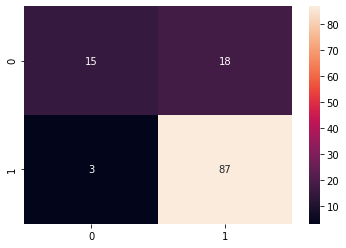

In [55]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
print("Accuracy Score :", accuracy_score(Y_test, y_pred))
cm=confusion_matrix(Y_test, y_pred)
print("Confusion Matrix : \n",cm)
sns.heatmap(cm,annot=True)

print("Classification Report :\n",classification_report(Y_test, y_pred))


In [56]:
test=[[1,1,0,1,4583,0,133,360,0,1]]
print(test)
print(log_reg.predict_proba(test))
print(log_reg.predict(test))
print(log_reg.predict([[0,0,1,0,6000,0,141,360,1,2]])) 

[[1, 1, 0, 1, 4583, 0, 133, 360, 0, 1]]
[[0.85718045 0.14281955]]
[0]
[1]


In [57]:
import pickle
pickle.dump(log_reg,open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))
print(model.predict_proba([[0,0,1,0,6000,0,141,360,1,2]]))
print(model.predict([[0,0,1,0,6000,0,141,360,1,2]]))

[[0.28744351 0.71255649]]
[1]


## Use the model and display in flash

In [ ]:
# import numpy as np
import pandas as pd
from flask import Flask, request, render_template
import pickle

app = Flask(__name__)
model = pickle.load(open('model.pkl','rb'))


@app.route('/')
def home():
    return render_template('form.html')

@app.route('/predict',methods=['POST','GET'])
def predict():
    input_features = [float(x) for x in request.form.values()]
    features_value = [np.array(input_features)]
    
    features_name = ["Married","Dependents","Education","Self_Employed","ApplicantIncome",
                     "CoapplicantIncome","LoanAmount","Loan_Amount_Term","Credit_History","Property_Area"]
    df = pd.DataFrame(features_value, columns=features_name)
    output = model.predict(df)
    
    if output == 1:
        res_val = "** a higher probalility of getting a Loan**"
    else:
        res_val = "very low changes of getting a Loan"
        
    return render_template('form.html', pred='Applicant has {}'.format(res_val))
if __name__ == "__main__":
    app.run()
                     
                         

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [04/Sep/2020 18:12:34] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [04/Sep/2020 18:13:14] "POST /predict HTTP/1.1" 200 -
